In [49]:
import pandas as pd                     # to extract data from dataset(.csv file)                           #used to read and write to csv files
import numpy as np                      #used to convert input into numpy arrays to be fed to the model
import matplotlib.pyplot as plt         #to plot/visualize sales data and sales forecasting
df = pd.read_csv('https://retoolapi.dev/x1GTna/data')
df



ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


In [2]:
# # Selecting first two columns from uploaded dataset
df = df.iloc[:,0:2]

In [43]:
# inferring datetime
df.iloc[:,0] = pd.to_datetime(df.iloc[:,0], infer_datetime_format=True, errors='coerce')
df.columns = ['datetime', 'sales']
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%y')

In [47]:
df

,datetime,sales
0,2019-01-31,1172570
1,2019-02-28,1257531
2,2019-03-31,1552036
3,2019-04-30,1355463
4,2019-05-31,1606175
5,2019-06-30,1462590
6,2019-07-31,1417362
7,2019-08-31,1628503
8,2019-09-30,1282712
9,2019-10-31,1384010


In [46]:
#indexing by month column
indexedDataset = df.set_index(df['datetime'])

In [6]:
indexedDataset['datetime']



datetime
2019-01-31   2019-01-31
2019-02-28   2019-02-28
2019-03-31   2019-03-31
2019-04-30   2019-04-30
2019-05-31   2019-05-31
2019-06-30   2019-06-30
2019-07-31   2019-07-31
2019-08-31   2019-08-31
2019-09-30   2019-09-30
2019-10-31   2019-10-31
2019-11-30   2019-11-30
2019-12-31   2019-12-31
2020-01-31   2020-01-31
2020-02-29   2020-02-29
2020-03-31   2020-03-31
2020-04-30   2020-04-30
2020-05-31   2020-05-31
2020-06-30   2020-06-30
2020-07-31   2020-07-31
2020-08-31   2020-08-31
2020-09-30   2020-09-30
Name: datetime, dtype: datetime64[ns]

In [7]:
# rolling mean with window size 3(3months)
rolmean = indexedDataset.rolling(window=3).mean()

In [8]:
# rolling mean with window size 3(3months)
rolstd = indexedDataset.rolling(window=3).std()

In [9]:
# perform dickey-fuller test for indexedDataset
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(indexedDataset['sales'], autolag='AIC')
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] =value
    return dfoutput
dfoutput = test_stationarity(indexedDataset['sales'])
dfoutput

Test Statistic                 -2.826603
p-value                         0.054573
#Lags Used                      0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64

In [10]:
dfoutput['Test Statistic'] < dfoutput['Critical Value (10%)'] and dfoutput['p-value']<=0.1

#Critical Value > test -> 10% error accuracy is allowed(for only 10% we can reject null hypothesis and concluse that given series is stationery)
# strationery series are requied for TSA

True

In [11]:
# strationery series are requied for TSA
indexedDataset

,datetime,sales
datetime,,
2019-01-31,2019-01-31,1172570
2019-02-28,2019-02-28,1257531
2019-03-31,2019-03-31,1552036
2019-04-30,2019-04-30,1355463
2019-05-31,2019-05-31,1606175
2019-06-30,2019-06-30,1462590
2019-07-31,2019-07-31,1417362
2019-08-31,2019-08-31,1628503
2019-09-30,2019-09-30,1282712


In [12]:
# indexedDataset_logScale = np.log(indexedDataset)
temp = indexedDataset
temp['sales'] = np.log(temp['sales'])
indexedDataset_logScale = temp

In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] =value
    print(dfoutput)
# perform df test for logScale indexeddataset
test_stationarity(indexedDataset_logScale['sales'])

Test Statistic                 -2.841534
p-value                         0.052582
#Lags Used                      0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


In [14]:

#Critical Value > test -> 10% error accuracy is allowed(for only 10% we can reject null hypothesis and concluse that given series is stationery)
# strationery series are requied for TSA

In [15]:
# moving std and average for log scale indexed dataset
movingStd = indexedDataset_logScale.rolling(window=3).std()
movingAverage = indexedDataset_logScale.rolling(window=3).mean()

In [16]:
#dataset LogScale - moving averge
dataSetLogScaleMinusMA = indexedDataset_logScale-movingAverage

In [17]:
dataSetLogScaleMinusMA.dropna(inplace=True)

In [18]:
# perform df test for dataSetLogScaleMinusMA
# test_stationarity(dataSetLogScaleMinusMA)

In [19]:
# exponential weighted average
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=3, min_periods=0, adjust=True).mean()

In [20]:
dataSetLogScaleMinusEDWA = indexedDataset_logScale - movingAverage
dataSetLogScaleMinusEDWA.dropna(inplace=True)

In [21]:
# perform df test for logScaleDataset - exponentialDecayWeightedAverage
# test_stationarity(dataSetLogScaleMinusEDWA)

In [22]:
#shifting
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
datasetLogDiffShifting.dropna(inplace=True)

In [23]:
# perform df test for datasetLog - shifteddataset
# test_stationarity(dataSetLogScaleMinusEDWA)

In [24]:
# 
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(indexedDataset_logScale)
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid
# pip install statsmodels --upgrade

In [25]:
# ACF and PACF(may require ploting)
# nlags depends on number of datapoints
# Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 10.(in this case)
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting['sales'], nlags=9)
lag_pacf = pacf(datasetLogDiffShifting['sales'], nlags=9, method='ols')
# p value -> partial autocorrelation, d value -> autocorrlation
lag_acf

array([ 1.        , -0.28846432, -0.19409247,  0.17408256, -0.1436884 ,
       -0.04298298,  0.03626372,  0.10835975, -0.2189435 ,  0.18017821])

Text(0.5, 1.0, 'Autocorrelation Function')

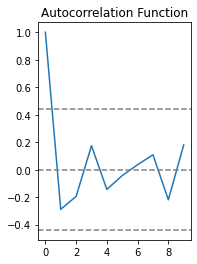

In [26]:
# Plotting ACF - Q VALUE
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting['sales'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting['sales'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Autocorrelation Function')

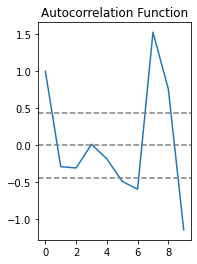

In [27]:
# Plotting PACF -  P VALUE
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting['sales'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting['sales'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
# D value = 1 difference

In [28]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(indexedDataset_logScale['sales'], order=(1,1,1))
results_ARIMA = model.fit()

/Users/ajaysharma/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ajaysharma/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ajaysharma/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [29]:
# printing RSA Value
results_ARIMA.fittedvalues

print(sum(results_ARIMA.fittedvalues[1:]-datasetLogDiffShifting['sales'])**2)

79218.56342456327


In [30]:
# predictions + data transformation
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff

datetime
2019-01-31     0.000000
2019-02-28    13.974708
2019-03-31    14.024799
2019-04-30    14.166652
2019-05-31    14.099622
2019-06-30    14.202055
2019-07-31    14.160747
2019-08-31    14.147592
2019-09-30    14.223943
2019-10-31    14.105643
2019-11-30    14.141513
2019-12-31    14.163574
2020-01-31    14.169944
2020-02-29    14.055479
2020-03-31    14.156091
2020-04-30    13.934515
2020-05-31    13.686165
2020-06-30    14.022498
2020-07-31    14.033740
2020-08-31    14.078453
2020-09-30    14.065980
dtype: float64

In [31]:
# convert to culmulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

datetime
2019-01-31      0.000000
2019-02-28     13.974708
2019-03-31     27.999507
2019-04-30     42.166159
2019-05-31     56.265781
2019-06-30     70.467836
2019-07-31     84.628584
2019-08-31     98.776176
2019-09-30    113.000119
2019-10-31    127.105762
2019-11-30    141.247275
2019-12-31    155.410850
2020-01-31    169.580793
2020-02-29    183.636272
2020-03-31    197.792364
2020-04-30    211.726878
2020-05-31    225.413043
2020-06-30    239.435541
2020-07-31    253.469281
2020-08-31    267.547735
2020-09-30    281.613715
dtype: float64

In [32]:
# predictions in log scale
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['sales'], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

In [33]:
predictions_ARIMA_log

datetime
2019-01-31     13.974708
2019-02-28     28.019369
2019-03-31     42.254585
2019-04-30     56.285813
2019-05-31     70.555147
2019-06-30     84.663555
2019-07-31     98.792892
2019-08-31    113.079348
2019-09-30    127.064606
2019-10-31    141.246257
2019-11-30    155.431015
2019-12-31    169.604224
2020-01-31    183.542493
2020-02-29    197.812750
2020-03-31    211.516636
2020-04-30    224.968130
2020-05-31    239.395555
2020-06-30    253.445554
2020-07-31    267.574672
2020-08-31    281.624447
2020-09-30    295.744214
dtype: float64

In [34]:
# predictions in original scale
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA

datetime
2019-01-31     1.172570e+06
2019-02-28     1.474543e+12
2019-03-31     2.243536e+18
2019-04-30     2.783671e+24
2019-05-31     4.382390e+30
2019-06-30     5.873743e+36
2019-07-31     8.039104e+42
2019-08-31     1.287469e+49
2019-09-30     1.525659e+55
2019-10-31     2.200241e+61
2019-11-30     3.182966e+67
2019-12-31     4.551751e+73
2020-01-31     5.146261e+79
2020-02-29     8.109342e+85
2020-03-31     7.252834e+91
2020-04-30     5.039848e+97
2020-05-31    9.293269e+103
2020-06-30    1.174912e+110
2020-07-31    1.607694e+116
2020-08-31    2.032091e+122
2020-09-30    2.754736e+128
dtype: float64

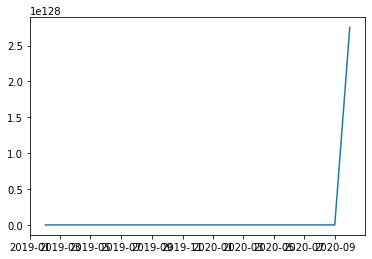

In [35]:
plt.plot(predictions_ARIMA)


In [36]:
# predictions in array format
predictions = np.exp(results_ARIMA.predict())[1:]
# actual sales
actual = np.exp(indexedDataset['sales'])[1:]

from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
# error calculation
rmse = np.sqrt(mean_squared_error(actual,predictions))
mape = mean_absolute_percentage_error(actual,predictions)


In [37]:
forecast = np.exp(results_ARIMA.forecast(steps=5))

In [38]:
type(forecast)

pandas.core.series.Series

In [39]:
rmse.round()

231214.0

In [40]:
(mape*100).round()

16.0